# 5. 딥러닝 기초

## 5.1 선형 회귀(Linear Regression)

- 연속된 값을 예측
    - ex) 주택 가격, 기온, 판매량 ...

----

#### 5.1.1 선형 회귀의 기본 요소들

-  예측 함수가 입력 피처들 의 선형 조합으로 표현된다고 가정

----

#### 5.1.2 선형 모델

- 간단란 예로 집의 면적(제곱 미터)과 지어진 후 몇 년이 되었는지를 입력으로 사용해서 주택 가격을 예측하는 문제

price=𝑤area ·area+𝑤age ·age+𝑏

- 벡터로 표현
    - 𝑦ˆ=𝑤1 ·𝑥1 +...+𝑤𝑑 ·𝑥𝑑 +𝑏
    - 𝑦ˆ = w⊤x + 𝑏 

- 데이터 포인트들의 집합𝑋 와예측값yˆ 은아래와같은행렬-벡터곱의공식이됩니다.
    - yˆ = Xw + 𝑏

____

#### 5.1.3 학습 데이터

- 레이블을 예측하기 위해서 사용된 두 값은 ’피처(feature)’ 또는 ’공변량(covariate)’이라고 합니다. 피처는 샘플의 특징을 표현하는데 사용

- 일반적으로 수집한 샘플의 개수를 𝑛 으로 표기하고, 각 샘플은 인덱스 𝑖 를 사용해서 \\(𝑥^{(𝑖)} = [𝑥_1^{(i)}, 𝑥_2^{(i)}]\\) 와 레이블은 \\(𝑦^{(𝑖)}\\) 로 표현

____

#### 5.1.4 Loss 함수

- \\(ㅣ^{(i)}(w, b) =   \frac{1}{2} ( \hat{y^{(i)}} - y^{(i)}) ^2\\)
    - \\(ㅣ^{(i)}(w, b)\\) --> loss function
    - \\(( \hat{y^{(i)}} - y^{(i)}) ^2\\) --> square loss

- \\(  L(w, b) = \frac{1}{n} \sum_{i=1}^n l^{(i)}(w, b) = \frac{1}{n} \sum_{i=1}^n \frac{1}{2}(w^{T}x^{(i)} + b -y^{(i)})^2  \\)

- 학습 샘플들의 평균loss를 최소화하는 모델 파라미터 \\( w^{*}\\) 와 \\( b^{*}\\) 를 찾는 것이 모델을 학습시키는 것

____

#### 5.1.5 최적화 알고리즘

- 딥러닝에서는 산술적인 솔루션으로 미니 배치를 적용한 stochastic gradient descent 방법이 널리 사용
- 일반적으로는 난수를 이용해서 모델 파라미터를 초기화합니다. 그 후, 데이터를 반복적으로 사용해서 loss 함수의 값을 줄이는 것을 반복합니다. <br>
  각 반 복에서는 학습 데이터에서 미리 정한 개수만큼의 샘플들을 임의로 또 균일하게 뽑아서 미니 배치 B 를 구성하고, <br>
  미니 배치의 값들에 대한 평균 loss 값의 모델 파라미터에 대한 미분을 구합니다. <br>
  마지막으로 이 결과와 미리 정의된 스탭크기 𝜂 > 0 를 곱해서 loss 값이 최소화 되 는방향으로 파라미터를 변경합니다. 
  <br>수식으로 표현하면 다음과 같습니다.

____

#### 5.1.6 모델을 이용한 예측

- 학습을 통해서 loss 함수를 최소화시키는 최적의 값 w*,𝑏* 를 구할 필요는 없습니다.<br>
  다만,이 최적의 값에 근접하는 값을 학습을 통해서 찾는 것입니다.이후,학습된 선형회귀 모델 wˆ⊤𝑥+ˆ𝑏 을 이용해서 학습 데이터셋에 없는 집정보에 대한 집가격을 추정합니다. <br>
  “추정”을 “모델 예측(prediction)” 또는 “모델 추론 (inference)” 라고 합니다.

____

#### 5.1.7 선형 회귀에서 딥 네트워크로

- 지금까지 선형 함수만을 이야기했는데, 뉴럴 네트워크는 이 보다 많은 것을 다룹니다. <br>
  물론 선형 함수는 중요한 구성 요소입니다. 이제 모든 것을 ‘층(layer)’ 표기법으로 다시 기술해 보겠습니다.

____

#### 5.1.8 뉴럴 네트워크 다이어그램

- 따로 그림 참조할것...

____

#### 5.1.9 생물학으로 우회

____

#### 5.1.10 벡터화로 빠르게 만들기

- 모델 학습 및 예측을 수행할 때, 벡터 연산을 사용하고 이를 통해서 여러 값들은 한번에 처리합니다. <br>
  이것이 왜 중요한지 설명하기위해서 벡터들을 더하는 두 가지 방법을 생각해봅시다. 우선 1000 차원의 벡터 두 개를 생성

In [1]:
from mxnet import nd 
from time import time

a = nd.ones(shape=10000)
b = nd.ones(shape=10000)

- 두 벡터를 더하는 방법 중에 하나는 for loop을 이용해서 벡터의 각 값들을 하나씩 더하는 것

In [3]:
start = time()
c = nd.zeros(shape=10000) 

for i in range(10000):
    c[i] = a[i] + b[i]
    
time() - start

0.7026338577270508

- 다른 방법으로는 두 벡터를 직접 더함

In [4]:
start = time()
d = a + b 
time() - start

0.00010895729064941406

- 당연하게도 벡터를 직접 더하는 방법이 훨씬 더 빠릅니다. <br>
  코드를 벡터화하는 것은 연산 속도를 빠르게 하는 좋은 방법입니다.  <br>
  마찬가지로 연산식을 간단하게 하고, 표기에 있어서 잠재적인 오류를 줄여주는 효과

#### 5.1.11 표준 분포와 제곱 Loss

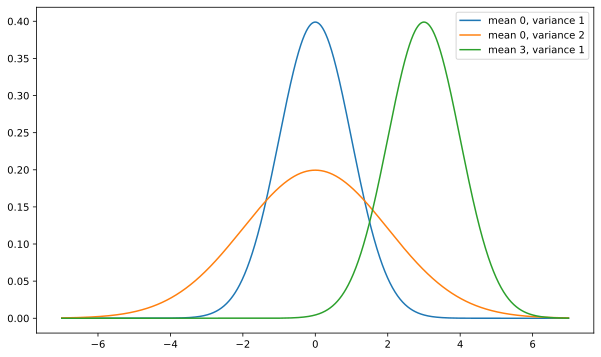

In [9]:
from matplotlib import pyplot as plt 
from IPython import display
from mxnet import nd
import math

x = nd.arange(-7, 7, 0.01)
# Mean and variance pairs 
parameters = [(0,1), (0,2), (3,1)]

# Display SVG rather than JPG
display.set_matplotlib_formats('svg')
plt.figure(figsize=(10, 6))

for (mu, sigma) in parameters:
    p = (1/math.sqrt(2 * math.pi * sigma**2)) * nd.exp(-(0.5/sigma**2) * (x-mu)**2)    
    plt.plot(x.asnumpy(), p.asnumpy(), label='mean ' + str(mu) + ', variance ' + str(sigma))
    
plt.legend()
plt.show()

____

#### 5.1.12 요약 

- 머신러닝에서 중요한 요소는 학습 데이터, loss 함수, 최적화 알고리즘, 그리고 당연하지만 모델자체입니다.
- 벡터화는 모든 것(수학)을 좋게 만들고, (코드를) 빠르게 만들어 줍니다.
- objective 함수를 최소화하는 것과 maximum likelihood를 구하는 것은 같은 것입니다.
- 선형 모델도 뉴럴 모델입니다.

## 5.2 선형 회귀를 처음부터 구현하기

In [1]:
from IPython import display
from matplotlib import pyplot as plt 
from mxnet import autograd, nd 
import random

#### 5.2.1 데이터셋 생성하기

In [2]:
num_inputs = 2
num_examples = 1000
true_w = nd.array([2, -3.4])
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [3]:
features[0], labels[0]

(
 [1.1630787 0.4838046]
 <NDArray 2 @cpu(0)>, 
 [4.879625]
 <NDArray 1 @cpu(0)>)

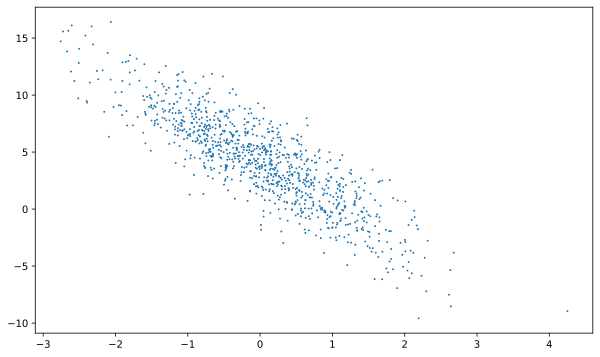

In [4]:
def use_svg_display():
    # Display in vector graphics
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)): 
    use_svg_display()
    # Set the size of the graph to be plotted 
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

____

#### 5.2.2 데이터 읽기

In [5]:
# This function has been saved in the d2l package for future use
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    # The examples are read at random, in no particular order 
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The “take” function will then return the corresponding element based # on the indices

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels): 
    print(X, y)
    break


[[-0.4321104  -0.18872944]
 [-1.298962   -0.831105  ]
 [ 0.28553766 -1.9045949 ]
 [ 0.575461   -0.4195624 ]
 [ 1.5864965  -1.7073818 ]
 [-0.12590429 -0.77844995]
 [ 0.17943779  1.3990829 ]
 [ 2.2772653  -0.4185659 ]
 [-1.4248496   1.634742  ]
 [ 1.5221801  -0.63030165]]
<NDArray 10x2 @cpu(0)> 
[ 3.985683    4.429899   11.244833    6.7590284  13.196526    6.581011
 -0.20697866 10.188307   -4.2019567   9.356409  ]
<NDArray 10 @cpu(0)>


____

#### 5.2.3 모델 파라미터들 초기화하기

In [11]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
print(w.shape)
b = nd.zeros(shape=(1,))
print(b.shape)

(2, 1)
(1,)


In [14]:
w.attach_grad()
b.attach_grad()

____

#### 5.2.4 모델 정의하기

In [15]:
# This function has been saved in the d2l package for future use
def linreg(X, w, b):
    return nd.dot(X, w) + b

____

#### 5.2.5 손실 함수(loss function) 정의하기

In [16]:
# This function has been saved in the d2l package for future use
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

____

#### 5.2.6 최적화 알고리즘 정의하기

In [17]:
# This function has been saved in the d2l package for future use
def sgd(params, lr, batch_size): 
    for param in params:
        param[:] = param - lr * param.grad / batch_size

#### 5.7 학습

In [18]:
lr = 0.03 # Learning rate
num_epochs = 10 # Number of iterations 
net = linreg # Our fancy linear model 
loss = squared_loss # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all 
    # the examples in the training data set are used once in one epoch
    # iteration. The features and tags of mini-batch examples are given by X 
    # and y respectively
    
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y) # Minibatch loss in X and y
        l.backward() # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
    
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.035164
epoch 2, loss 0.000124
epoch 3, loss 0.000048
epoch 4, loss 0.000048
epoch 5, loss 0.000048
epoch 6, loss 0.000048
epoch 7, loss 0.000048
epoch 8, loss 0.000048
epoch 9, loss 0.000048
epoch 10, loss 0.000048


In [19]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w 
[-0.00013232  0.00031519]
<NDArray 2 @cpu(0)>
Error in estimating b 
[-0.00041819]
<NDArray 1 @cpu(0)>


____

## 5.3 선형 회귀의 간결한 구현

#### 5.3.1 데이터 셋 만들기

In [20]:
from mxnet import autograd, nd

num_inputs = 2
num_examples = 1000

true_w = nd.array([2, -3.4])
true_b = 4.2

features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

____

#### 5.3.2 데이터 읽기

In [21]:
from mxnet.gluon import data as gdata 

batch_size = 10

# Combine the features and labels of the training data
dataset = gdata.ArrayDataset(features, labels)

# Randomly reading mini-batches
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [22]:
for X, y in data_iter:
    print(X, y)
    break


[[-1.5152733  -1.0601213 ]
 [ 0.5707338  -0.603781  ]
 [ 0.08496547 -1.3156533 ]
 [-0.27882883 -1.2957566 ]
 [-0.66963845  1.1818241 ]
 [ 1.9485527   0.5890606 ]
 [ 0.4239656   0.02062522]
 [ 0.1316699   0.5989745 ]
 [-0.9147789   0.20934172]
 [ 2.19628    -0.05345696]]
<NDArray 10x2 @cpu(0)> 
[ 4.784173   7.3935843  8.837647   8.06171   -1.155748   6.113078
  4.982147   2.430585   1.6650598  8.768978 ]
<NDArray 10 @cpu(0)>


____

#### 5.3.3 모델 정의하기

In [23]:
from mxnet.gluon import nn
net = nn.Sequential()

In [24]:
net.add(nn.Dense(1))

In [25]:
net

Sequential(
  (0): Dense(None -> 1, linear)
)

____

#### 5.3.4 모델 파라미터들 초기화하기

In [26]:
from mxnet import init

# mean 0, sd 0.01 , bias default = 0
net.initialize(init.Normal(sigma=0.01))

____

#### 5.3.5 손실 함수(loss function) 정의하기

In [28]:
from mxnet.gluon import loss as gloss
loss = gloss.L2Loss() # The squared loss is also known as the L2 norm loss
loss

L2Loss(batch_axis=0, w=1.0)

____

#### 5.3.6 최적화 알고리즘 정의하기

In [29]:
from mxnet import gluon
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})
trainer

____

#### 5.3.7 학습

In [30]:
num_epochs = 3

for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record(): 
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
        
    l = loss(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.056476
epoch 2, loss: 0.000263
epoch 3, loss: 0.000050


In [32]:
w = net[0].weight.data()
print('Error in estimating w', true_w.reshape(w.shape) - w) 

b = net[0].bias.data()
print('Error in estimating b', true_b - b)

Error in estimating w 
[[ 0.00046468 -0.0008347 ]]
<NDArray 1x2 @cpu(0)>
Error in estimating b 
[0.00092173]
<NDArray 1 @cpu(0)>


____

## 5.4 Softmax 회귀(regression)

- 코드 없음... 내용은 잘 볼것.

- one hot encoding 
    - {고양이, 닭, 강아지} --> 𝑦 ∈ {(1,0,0),(0,1,0),(0,0,1)}, 𝑦 는 3차원 벡터로 (1,0,0)은 고양이를, (0,1,0)은 닭은, (0,0,1)은 강아지를 의미

- softmax 회귀(regression)의 결과는 모든 결과값들의 합이 1이 되도록 하는 비선형성에 영향을 받고,각 결과값은 0 또는 양수값

____

## 5.5 이미지 분류 데이터 (Fashion-MNIST)

#### 5.5 이미지 분류 데이터 (Fashion-MNIST)

In [1]:
import sys 
sys.path.insert(0, '..')
%matplotlib inline
import d2l
from mxnet.gluon import data as gdata 
import sys
import time

In [2]:
mnist_train = gdata.vision.FashionMNIST(train=True)
mnist_test = gdata.vision.FashionMNIST(train=False)

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [4]:
features, label = mnist_train[0]

In [5]:
features.shape, features.dtype

((28, 28, 1), numpy.uint8)

In [6]:
label, type(label), label.dtype

(2, numpy.int32, dtype('int32'))

In [31]:
# This function has been saved in the d2l package for future use
def get_fashion_mnist_labels(labels):
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat',
        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    return [text_labels[int(i)] for i in labels]

In [32]:
# This function has been saved in the d2l package for future use
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # Here _ means that we ignore (not use) variables
    _, figs = d2l.plt.subplots(1, len(images), figsize=(12, 12))
    
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

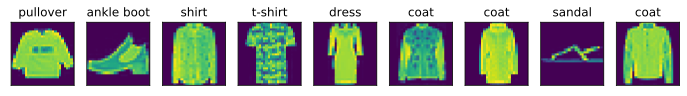

In [9]:
X, y = mnist_train[0:9]
show_fashion_mnist(X, get_fashion_mnist_labels(y))

___

#### 5.5.2 미니 배치 읽기

In [10]:
batch_size = 256
transformer = gdata.vision.transforms.ToTensor() 

if sys.platform.startswith('win'):
    # 0 means no additional processes are needed to speed up the reading of # data
    num_workers = 0
else:
    num_workers = 4
    
train_iter = gdata.DataLoader(
    mnist_train.transform_first(transformer),
    batch_size, shuffle=True,
    num_workers=num_workers)
    
test_iter = gdata.DataLoader(
    mnist_test.transform_first(transformer),
    batch_size, shuffle=False,
    num_workers=num_workers)

In [11]:
start = time.time()

for X, y in train_iter:
    continue
    
print('%.2f sec' % (time.time() - start))

0.61 sec


____

## 5.6 Softmax 회귀(regression)를 처음부터 구현하기

In [12]:
import sys 
sys.path.insert(0, '..')

%matplotlib inline
import d2l
from mxnet import autograd, nd

In [13]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

____

#### 5.6.1 모델 파라미터 초기화하기

In [14]:
num_inputs = 784
num_outputs = 10
W = nd.random.normal(scale=0.01, shape=(num_inputs, num_outputs))
b = nd.zeros(num_outputs)

In [15]:
W.attach_grad()
b.attach_grad()

____

#### 5.6.2 Softmax

In [16]:
X = nd.array([[1, 2, 3], [4, 5, 6]])
X.sum(axis=0, keepdims=True), X.sum(axis=1, keepdims=True)

(
 [[5. 7. 9.]]
 <NDArray 1x3 @cpu(0)>, 
 [[ 6.]
  [15.]]
 <NDArray 2x1 @cpu(0)>)

In [17]:
def softmax(X): 
    X_exp = X.exp()
    partition = X_exp.sum(axis=1, keepdims=True)
    return X_exp / partition # The broadcast mechanism is applied here

In [18]:
X = nd.random.normal(shape=(2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(axis=1)

(
 [[0.6264712  0.126293   0.01826552 0.10885343 0.12011679]
  [0.25569436 0.2917251  0.0754655  0.3024068  0.07470828]]
 <NDArray 2x5 @cpu(0)>, 
 [0.99999994 1.        ]
 <NDArray 2 @cpu(0)>)

____

#### 5.6.3 모델

In [19]:
def net(X):
    return softmax(nd.dot(X.reshape((-1, num_inputs)), W) + b)

____

#### 5.6.4 손실 함수(loss function)

In [20]:
y_hat = nd.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = nd.array([0, 2], dtype='int32')
nd.pick(y_hat, y)


[0.1 0.5]
<NDArray 2 @cpu(0)>

In [21]:
def cross_entropy(y_hat, y):
    return - nd.pick(y_hat, y).log()

____

#### 5.6.5 분류 정확도

In [22]:
def accuracy(y_hat, y):
    return (y_hat.argmax(axis=1) == y.astype('float32')).mean().asscalar()

In [23]:
accuracy(y_hat, y)

0.5

In [24]:
# The function will be gradually improved: the complete implementation will be 
# discussed in the "Image Augmentation" section
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
        n += y.size
    return acc_sum / n

In [25]:
evaluate_accuracy(test_iter, net)

0.0856

____

#### 5.6.6 모델 학습

In [26]:
num_epochs, lr = 5, 0.1
# This function has been saved in the d2l package for future use
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, trainer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0 
        for X, y in train_iter:
            with autograd.record(): 
                y_hat = net(X)
                l = loss(y_hat, y).sum()
            l.backward()
        
            if trainer is None:
                d2l.sgd(params, lr, batch_size)
            else:
                # This will be illustrated in the next section 
                trainer.step(batch_size)
                
            y = y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
            n += y.size
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
            
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs,
          batch_size, [W, b], lr)

epoch 1, loss 0.7864, train acc 0.748, test acc 0.799
epoch 2, loss 0.5747, train acc 0.809, test acc 0.823
epoch 3, loss 0.5280, train acc 0.825, test acc 0.831
epoch 4, loss 0.5063, train acc 0.830, test acc 0.838
epoch 5, loss 0.4892, train acc 0.834, test acc 0.837


____

#### 5.6.7 예측

In [33]:
for X, y in test_iter: 
    break
    
    
true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
    
titles = [truelabel + '\n' + predlabel
            for truelabel, predlabel in zip(true_labels, pred_labels)]
    
d2l.show_fashion_mnist(X[0:9], titles[0:9])

AttributeError: module 'd2l' has no attribute 'show_fashion_mnist'